# Introduction to Neural Networks


In [29]:
# Load necessary packages
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
#Load the data
(X_train, y_train), (X_test, y_test)=mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(10000,)

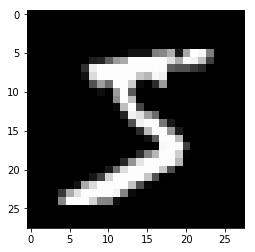

In [31]:
# Understanding the image data format
plt.imshow(X_train[0],cmap='gray')

In [32]:
y_train[0]
5

5

In [33]:
# Preprocessing the image data
image_height,image_width=28,28
X_train=X_train.reshape(60000,image_height*image_width)
X_test=X_test.reshape(10000,image_height*image_width)
print(X_train.shape)
print(X_test.shape)
(60000, 784)
(10000, 784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/= 255.0
X_test/= 255.0
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)
(60000, 10)
(10000, 10)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


(10000, 10)

In [34]:
# Build a model
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [35]:
#Train the model
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 48s 802us/step - loss: 0.1836 - acc: 0.9441 - val_loss: 0.1174 - val_acc: 0.9621
Epoch 2/20
60000/60000 [==============================] - 47s 776us/step - loss: 0.0811 - acc: 0.9745 - val_loss: 0.0867 - val_acc: 0.9740
Epoch 3/20
60000/60000 [==============================] - 38s 632us/step - loss: 0.0555 - acc: 0.9824 - val_loss: 0.0830 - val_acc: 0.9757
Epoch 4/20
60000/60000 [==============================] - 38s 634us/step - loss: 0.0429 - acc: 0.9860 - val_loss: 0.0896 - val_acc: 0.9771
Epoch 5/20
60000/60000 [==============================] - 37s 623us/step - loss: 0.0339 - acc: 0.9890 - val_loss: 0.0705 - val_acc: 0.9799
Epoch 6/20
60000/60000 [==============================] - 41s 685us/step - loss: 0.0296 - acc: 0.9905 - val_loss: 0.0825 - val_acc: 0.9787
Epoch 7/20
60000/60000 [==============================] - 42s 699us/step - loss: 0.0247 - acc: 0.9923 - val_loss: 0.

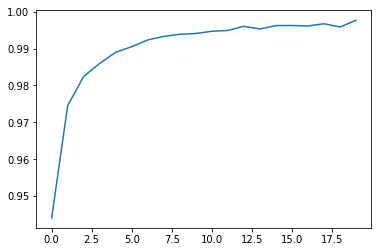

In [37]:
#Plot the accuracy of the training model
plt.plot(history.history['acc'])


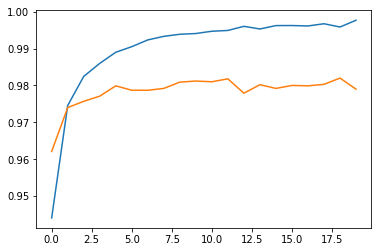

In [38]:
#Plot the accuracy of training and validation set
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])


In [39]:
#Accuracy of training and validation with loss
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 93us/step


[0.14710436482072065, 0.97899999999999998]